In [1]:
%%bash
exit 0


# you can use environment.yml file to set up the environment
mamba env create -f environment.yml
mamba activate cg-idps



         resid   exp_PRE
0     4.936461  0.500000
1    10.860215  0.342213
2    28.137830  0.415984
3    35.542522  0.379098
4    43.440860  0.254098
..         ...       ...
58  515.366569  0.364754
59  534.125122  0.256148
60  539.061584  0.661885
61  543.504399  0.635246
62  549.921799  0.831967

[63 rows x 2 columns]


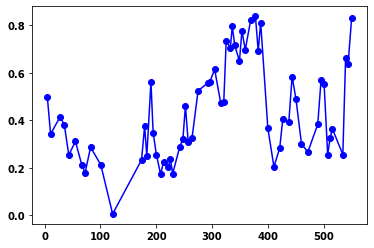

In [13]:
import pandas as pd

# Load the data from the pickle file
M1 = pd.read_pickle('ICL2.pkl')

# Assuming the DataFrame M1 has the experimental PRE data
# where column 1 is x (residue numbers) and column 2 is y (PRE values)
# Extract x and y
x = M1.iloc[:, 0]  # First column as x-axis
y = M1.iloc[:, 1]  # Second column as y-axis

# Combine into a new DataFrame
df = pd.DataFrame({'resid': x, 'exp_PRE': y})

# Display the processed DataFrame
print(df)
plt.plot(df['resid'], df['exp_PRE'], marker='o', linestyle='-', color='b', label='Experimental PRE')

In [8]:
from DEERPREdict.PRE import PREpredict
import MDAnalysis
import pandas as pd

# path to pdb+xtc
pdb_path="md_2000ns_ICL2.gro"
dcd_path="shortened_traj_ICL2.xtc"

# PRE analysis of simulations using PREpredict
# label == residue with PRE probe
def evaluatePRE(label):
    u = MDAnalysis.Universe(pdb_path,dcd_path)
    PRE = PREpredict(u, label, log_file = 'file.log', temperature = 283, atom_selection = 'N', sigma_scaling = 1.0) # Cbeta=True
    PRE.run(output_prefix = 'calcPREs/res', load_file=False, tau_t = 1e-10, tau_c = 1.0*1e-09, r_2 = 10, wh = 700)

# numbers are positions of PRE probes (labels)
evaluatePRE(24)




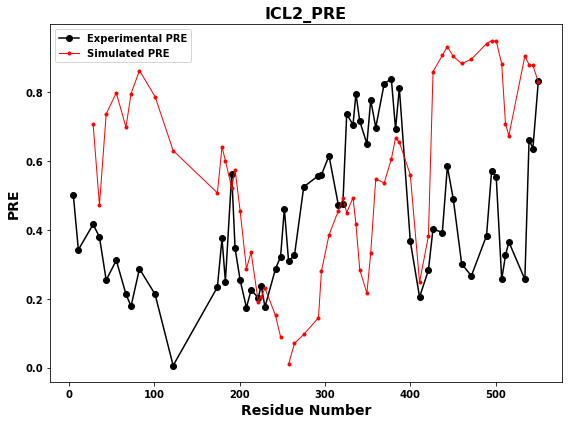

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load PRE from simulations into a DataFrame
filename = 'calcPREs/res-24.dat'
df_sim = pd.read_csv(
    filename,
    delim_whitespace=True,
    skiprows=1,
    names=['residue', 'i_ratio', 'gamma_2']
)

# Convert residue numbers to integers and rename the column for consistency
df_sim['residue'] = df_sim['residue'].astype(int)
df_sim = df_sim.rename(columns={'residue': 'resid'})

# Assuming `df` contains experimental PRE data
# Map simulated data (i_ratio) to the experimental DataFrame based on residue ID
df[f'sim_24'] = df_sim.set_index('resid')['i_ratio']

# PLOTTING PRE experimental vs simulations
plt.rcParams.update({'font.size': 10, 'font.weight': 'bold'})

title = 'ICL2_PRE'

fig, ax = plt.subplots(figsize=(8, 6))  # Single subplot for one label

# Scatter plot for experimental PRE data
ax.plot(
    df['resid'], 
    df[f'exp_PRE'], 
    marker='o', 
    color='black', 
    label='Experimental PRE'
)

# Line plot for simulated PRE data
ax.plot(
    df['resid'], 
    df[f'sim_24'], 
    color='red', 
    linewidth=1, 
    marker='o', 
    markersize=3, 
    label='Simulated PRE'
)

# Adding labels and title
ax.set_xlabel('Residue Number', fontsize=14, fontweight='bold')
ax.set_ylabel('PRE', fontsize=14, fontweight='bold')
ax.set_title(title, fontsize=16, fontweight='bold')
ax.legend()

plt.tight_layout()
plt.savefig(f'{title}.pdf')
plt.show()


